In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_df_name(file_path):
    file_name_with_ext = os.path.basename(file_path)
    file_name_without_ext = os.path.splitext(file_name_with_ext)[0]
    result = file_name_without_ext.split('_metrics')[0]
    return result

In [4]:
# Convert csvs to dataframes
def csv_to_df(file_paths):
    dataframes = {}
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            # Extract a name of df from the filename
            df_name = get_df_name(file_path)
            dataframes[df_name] = df
        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}")
    return dataframes

In [5]:
# Compare selected columns by epoch
def plot_compare(dataframes,column_to_compare):
    epoch_column = 'epoch'
    plot_data = []
    for df_name, df in dataframes.items():
        if epoch_column in df.columns and column_to_compare in df.columns:
            temp_df = df[[epoch_column, column_to_compare]].copy()
            temp_df['training method'] = df_name
            plot_data.append(temp_df)
        else:
            print(f"Warning: Required columns '{epoch_column}' or '{column_to_compare}' not found in {df_name}")

    if plot_data:
        combined_df = pd.concat(plot_data)

        # Visualize the result using seaborn
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=combined_df, x=epoch_column, y=column_to_compare, hue='training method')
        plt.title(f'Comparison of {column_to_compare} over {epoch_column}')
        plt.xlabel(epoch_column)
        plt.ylabel(column_to_compare)
        plt.grid(True)
        plt.show()
    else:
        print("No data available for plotting. Please check file names and column names.")

In [6]:
file_paths = ['../docs/csc_s3dis_train_metrics.csv',
              #'../docs/local_s3dis_train_metrics.csv',
              '../docs/sim_train_metrics.csv',
              '../docs/finetune_train_metrics.csv',
              '../docs/lora_train_metrics.csv'] 

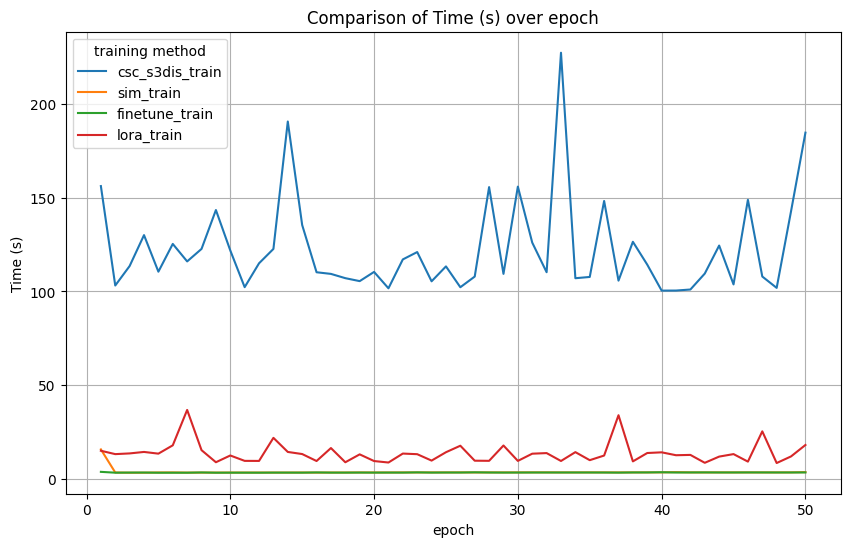

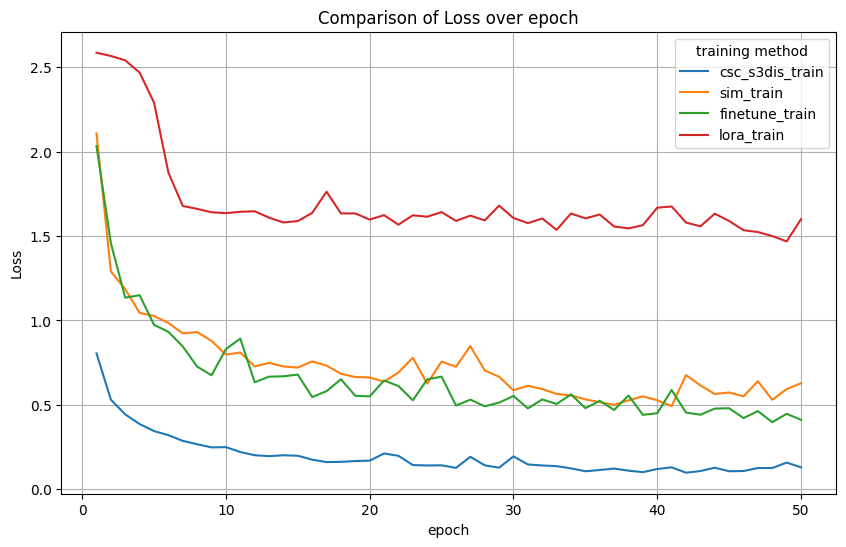

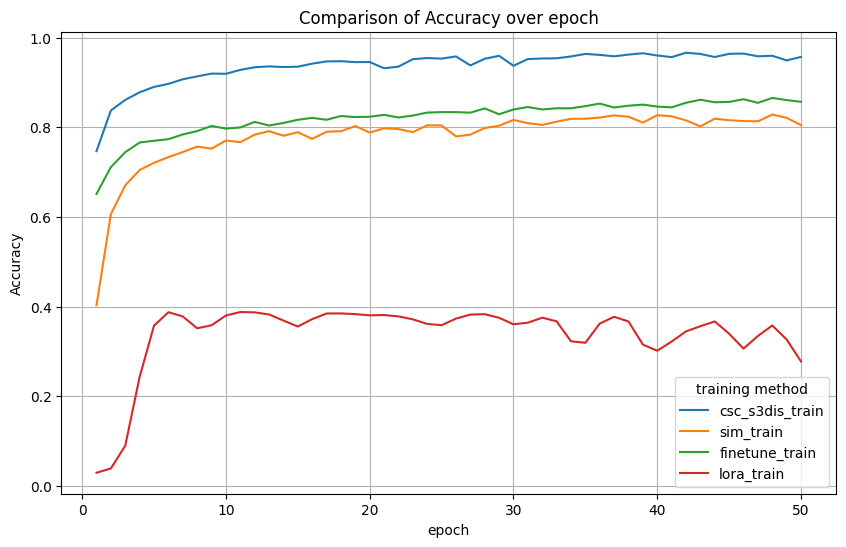

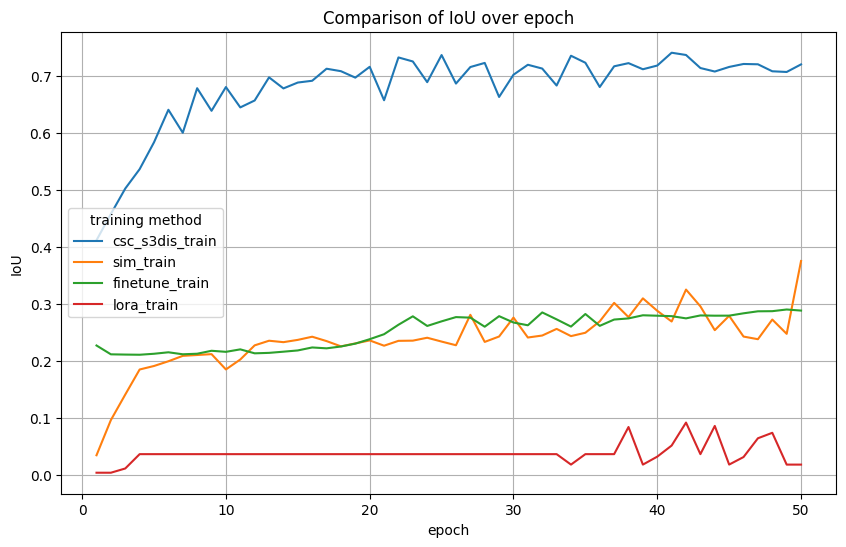

In [8]:
columns = ['Loss', 'Accuracy', 'IoU','Time (s)']
dataframes = csv_to_df(file_paths)

for column in columns:
    plot_compare(dataframes,column)